In [1]:
import numpy as np
import pandas as pd
import os

# set directory to previous folder if not done before
if os.getcwd().split('\\')[-1] == 'code':
    os.chdir('..')

# One Prob MATRIX

In [6]:
# import dask.dataframe as dd

# # Load the data as a Dask DataFrame
# dask_df = dd.read_parquet('output/consensus/full_data/consensus_matrix.parquet')

# # Perform operations as you would with pandas (operations are lazy and computed on demand)
# # For example, to compute the mean of a column:
# # result = dask_df['some_column'].mean().compute()

# # View the first few rows (triggers computation)
# # dask_df.head()

In [4]:
# read output\bootstrap\small_200\prob_matrix.csv
consensus_matrix = pd.read_parquet('output/consensus/full_data/consensus_matrix.parquet')
distance_matrix = 1 - consensus_matrix

MemoryError: Unable to allocate 17.0 GiB for an array with shape (47828, 47828) and data type float64

## Heatmap without order

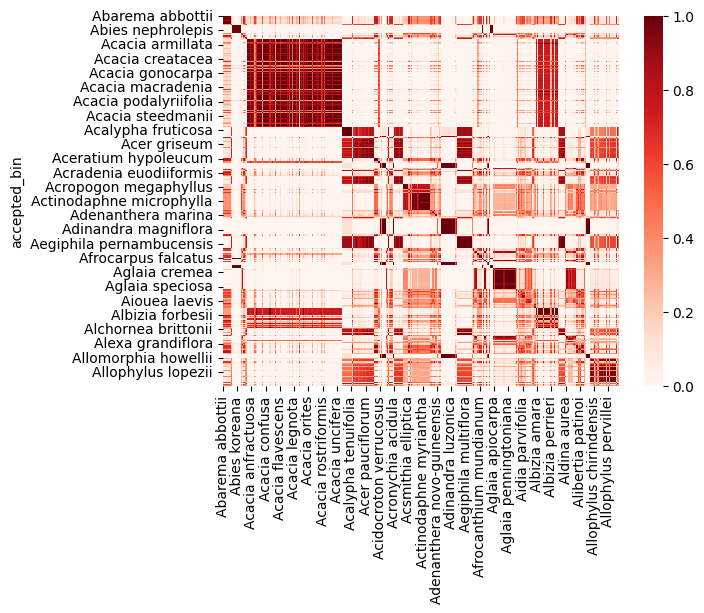

In [5]:
# plot consesnus matrix as heatmap
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(consensus_matrix, cmap='Reds')
plt.show()

## Species variance

(array([199.,   4.,   4.,   2.,   0.,   1.,   0.,   0., 298.,   8.,   7.,
          0.,  92.,  22., 104.,  66.,  70.,  29.,  29.,  23.,  17.,  27.,
         23.,  26.,  84.,  99.,  27., 111.,  47.,  55.,  22.,  18.,  29.,
         32.,  50.,  46.,  60.,  64.,  55.,  39.,  22.,  26.,  21.,  18.,
         10.,   7.,   3.,   2.,   1.,   1.]),
 array([0.0044212 , 0.00754666, 0.01067213, 0.01379759, 0.01692306,
        0.02004852, 0.02317398, 0.02629945, 0.02942491, 0.03255038,
        0.03567584, 0.0388013 , 0.04192677, 0.04505223, 0.0481777 ,
        0.05130316, 0.05442862, 0.05755409, 0.06067955, 0.06380502,
        0.06693048, 0.07005594, 0.07318141, 0.07630687, 0.07943234,
        0.0825578 , 0.08568326, 0.08880873, 0.09193419, 0.09505966,
        0.09818512, 0.10131058, 0.10443605, 0.10756151, 0.11068698,
        0.11381244, 0.1169379 , 0.12006337, 0.12318883, 0.1263143 ,
        0.12943976, 0.13256522, 0.13569069, 0.13881615, 0.14194162,
        0.14506708, 0.14819254, 0.15131801, 0.

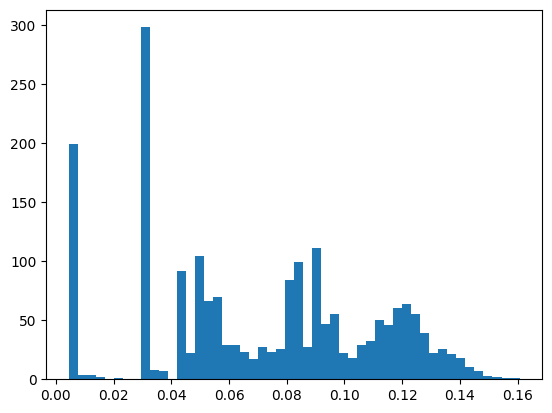

In [16]:
species_variance = np.mean(consensus_matrix * (1-consensus_matrix), axis = 1)

# plot species variance
plt.hist(species_variance, bins=50)

## Dendogram

In [6]:
# squareform
from scipy.spatial.distance import squareform

# condense distance matrix
distance_vector = squareform(distance_matrix)

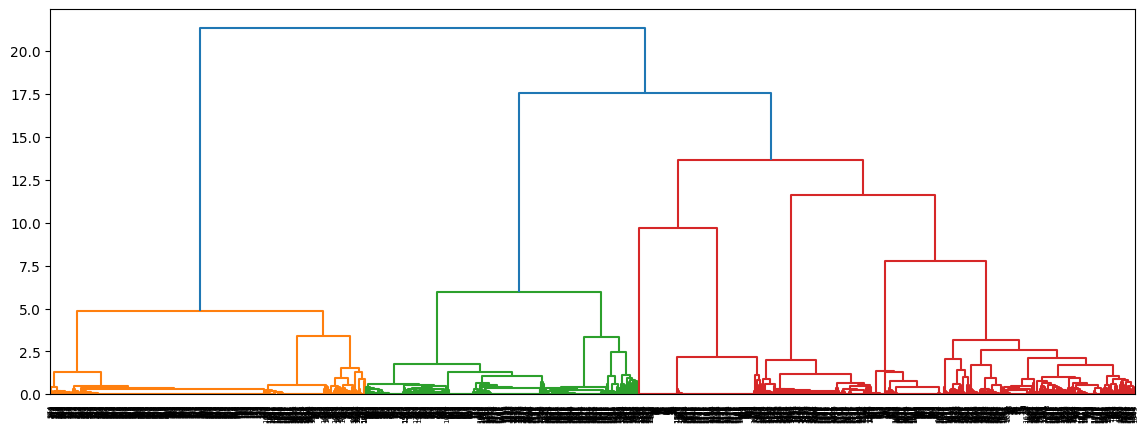

In [7]:
# perform hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# figsize
plt.figure(figsize=(14, 5))

linkage_matrix = linkage(distance_vector, method='ward') # there are different methods for linkage
dendrogram(linkage_matrix)

plt.show()



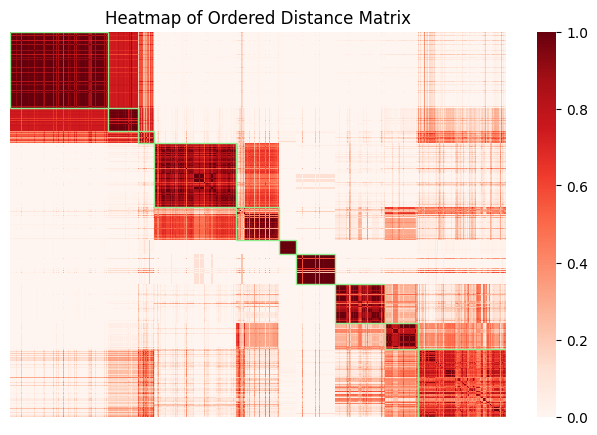

In [46]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform


num_clusters = 10

# Assuming `distance_matrix` is your full square distance matrix
# Convert to condensed distance matrix for clustering
condensed_distance_matrix = squareform(distance_matrix)

# Perform hierarchical clustering
Z = sch.linkage(condensed_distance_matrix, method='ward')

# Retrieve cluster labels at a given cutoff (not super sure how this works)
clusters = sch.fcluster(Z, t = num_clusters, criterion='maxclust')

# Order the distance matrix by clusters
order = np.argsort(clusters)  # This gives indices that sort the clusters
ordered_distance_matrix = consensus_matrix.values[order, :][:, order]


# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(ordered_distance_matrix, cmap='Reds', xticklabels=False, yticklabels=False)
plt.title('Heatmap of Ordered Distance Matrix')

# Draw squares around each cluster
unique_clusters = np.unique(clusters[order])
boundaries = {cluster: (np.min(np.where(clusters[order] == cluster)), np.max(np.where(clusters[order] == cluster))) for cluster in unique_clusters}
for cluster, (start, end) in boundaries.items():
    plt.hlines([start, end+1], start, end+1, color='lightgreen', lw=1)
    plt.vlines([start, end+1], start, end+1, color='lightgreen', lw=1)

# Various Prob Matrix

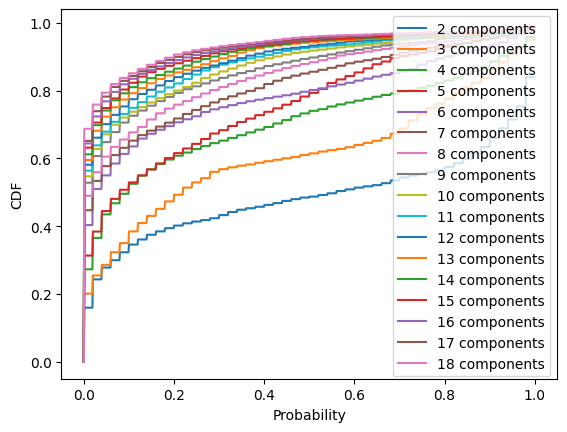

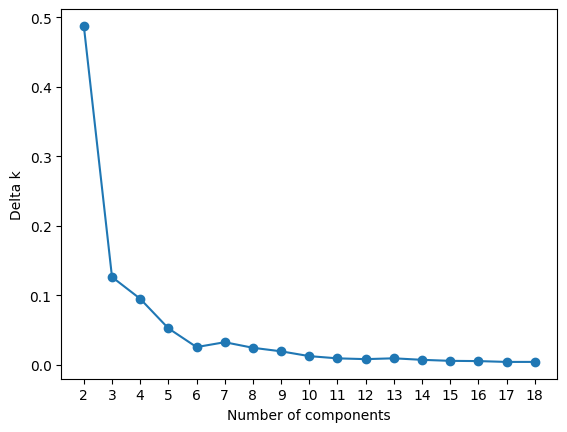

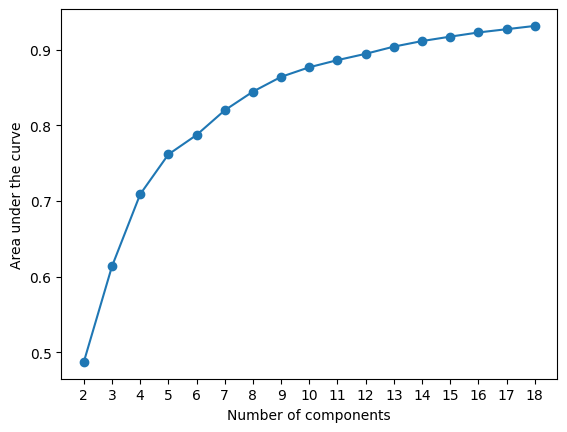

In [42]:
n_component_list = [i for i in range(2,19)]
consensus_dic = {}
n_integrate = 1000
cdf_range = np.linspace(0, 1, n_integrate)
areas = np.zeros(len(n_component_list))
delta_k = np.zeros(len(n_component_list))

for i, n_component in enumerate(n_component_list):
    consensus_matrix_n = pd.read_csv(f'output/bootstrap/small_2000/prob_matrix_{n_component}.csv', index_col=0)
    condensed_matrix = squareform(consensus_matrix_n.values - np.eye(consensus_matrix_n.shape[0]))
  
    # Compute CDF
    cdf = np.zeros(n_integrate)
    for j, c in enumerate(cdf_range):
        cdf[j] = np.sum(condensed_matrix < c) / len(condensed_matrix)

    # Compute area under the curve
    # ordered_condensed_matrix = np.sort(condensed_matrix)
    areas[i] = np.trapz(cdf, cdf_range)
    if n_component > 2:
        delta_k[i] = areas[i] - areas[i-1]
    else:
        delta_k[i] = areas[i]

    
    # plot CDF
    plt.plot(cdf_range, cdf, label=f'{n_component} components')

plt.legend()
plt.xlabel('Probability')
plt.ylabel('CDF')
plt.show()

# Plot delta k
plt.plot(n_component_list, delta_k, marker='o')
# xticks
plt.xticks(n_component_list)
plt.xlabel('Number of components')
plt.ylabel('Delta k')
plt.show()

# plot area
plt.plot(n_component_list, areas, marker = 'o')
plt.xticks(n_component_list)
plt.xlabel('Number of components')
plt.ylabel('Area under the curve')
plt.show()





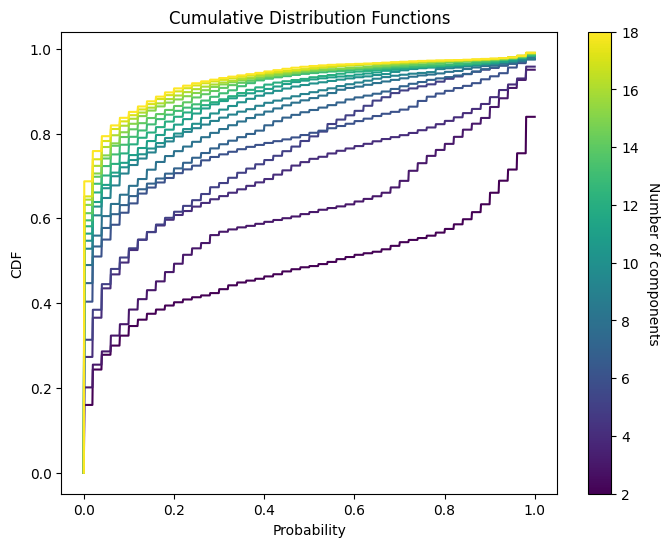

In [43]:

n_component_list = list(range(2, 19))
n_integrate = 1000
cdf_range = np.linspace(0, 1, n_integrate)
colors = plt.cm.viridis(np.linspace(0, 1, len(n_component_list)))  # Color map
areas = np.zeros(len(n_component_list))
delta_k = np.zeros(len(n_component_list))

# Prepare subplots
fig_cdf, ax_cdf = plt.subplots(figsize=(8, 6))  # Separate figure for CDF

for i, n_component in enumerate(n_component_list):
    # Load data and compute the condensed matrix
    consensus_matrix_n = pd.read_csv(f'output/bootstrap/small_2000/prob_matrix_{n_component}.csv', index_col=0)
    condensed_matrix = squareform(consensus_matrix_n.values - np.eye(consensus_matrix_n.shape[0]))

    # Compute CDF
    cdf = np.array([np.sum(condensed_matrix < c) / len(condensed_matrix) for c in cdf_range])

    # Plot CDF with a different color
    ax_cdf.plot(cdf_range, cdf, color=colors[i])

    # Calculate area under each CDF
    areas[i] = np.trapz(cdf, cdf_range)
    delta_k[i] = areas[i] - areas[i - 1] if i > 0 else areas[i]

# Customizations for CDF plot
ax_cdf.set_xlabel('Probability')
ax_cdf.set_ylabel('CDF')
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(n_component_list), vmax=max(n_component_list)))
cbar = plt.colorbar(sm, ax=ax_cdf)
cbar.set_label('Number of components', rotation=270, labelpad=15)   
plt.title('Cumulative Distribution Functions')

plt.show()

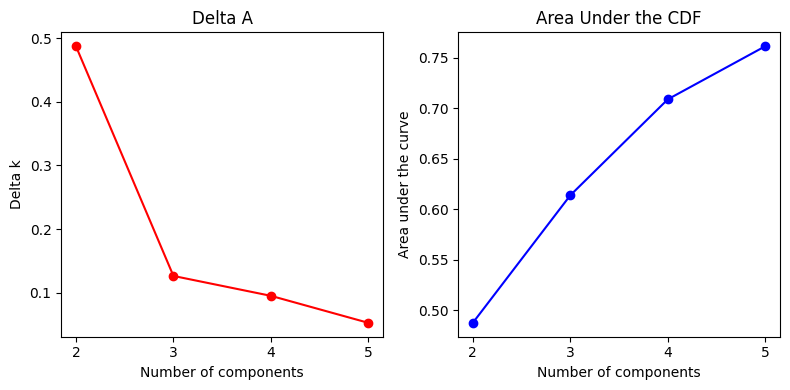

In [69]:
fig_delta_area, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))  # Combined figure for delta k and area

# Delta k Plot
ax1.plot(n_component_list, delta_k, marker='o', color='red')
ax1.set_xticks(n_component_list)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Delta k')
ax1.set_title('Delta A')

# Area Plot
ax2.plot(n_component_list, areas, marker='o', color='blue')
ax2.set_xticks(n_component_list)
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Area under the curve')
ax2.set_title('Area Under the CDF')

# Layout adjustment for the second figure
fig_delta_area.tight_layout()
plt.show()

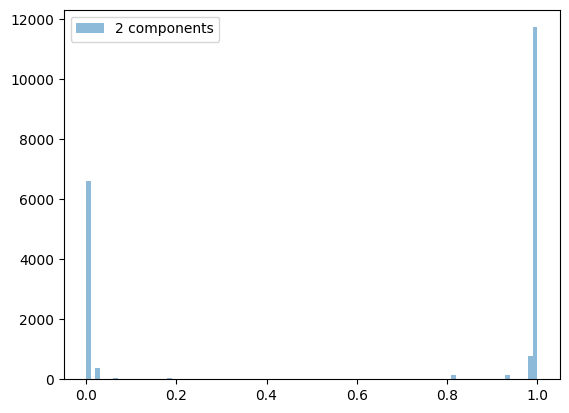

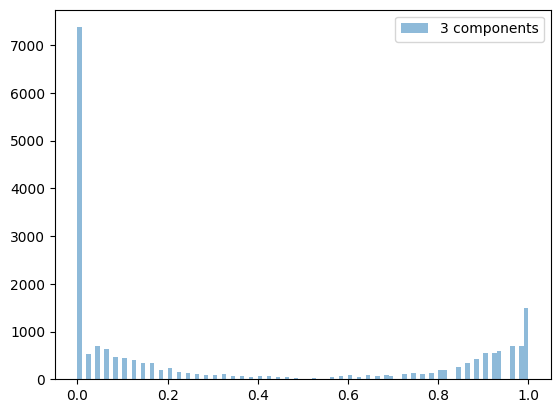

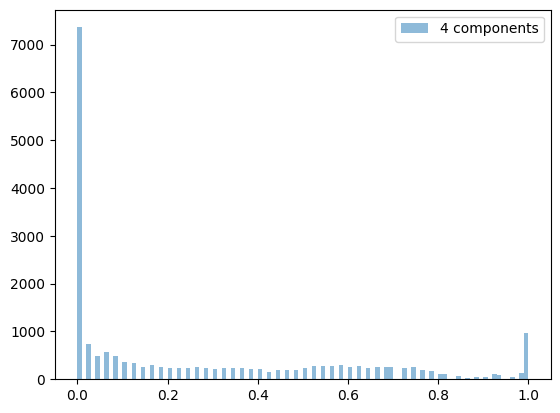

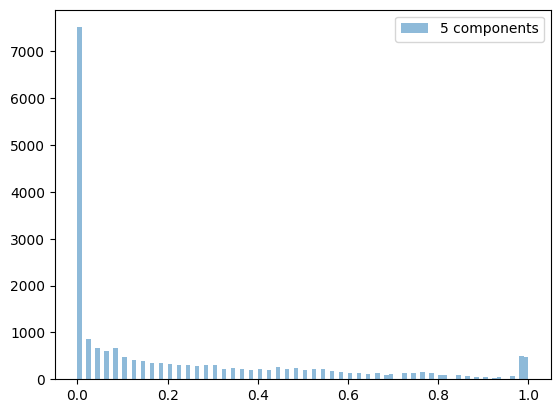

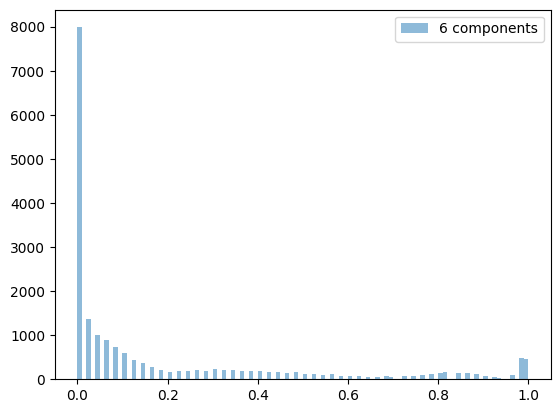

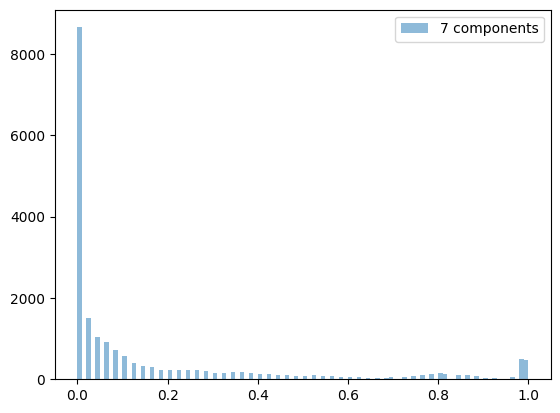

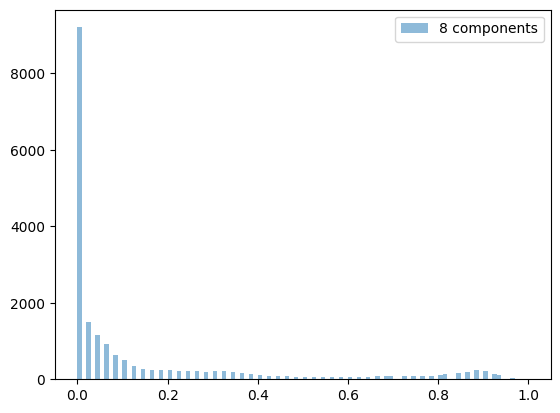

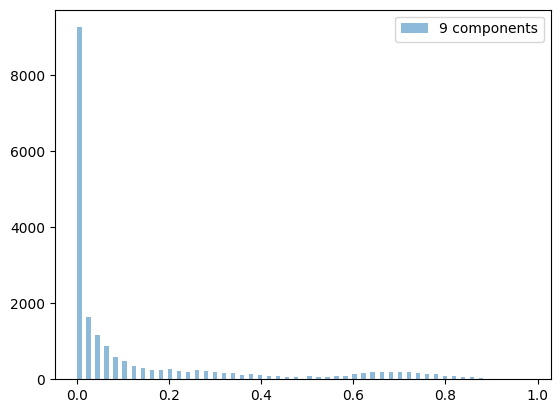

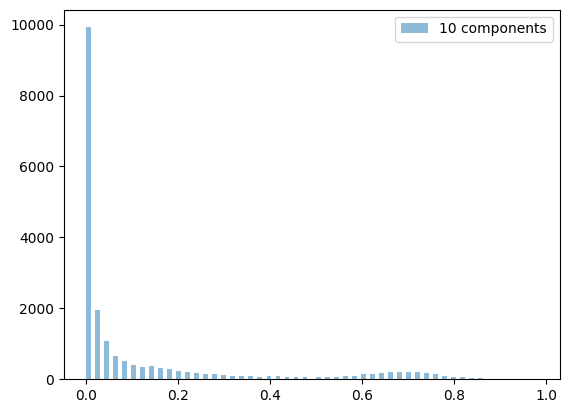

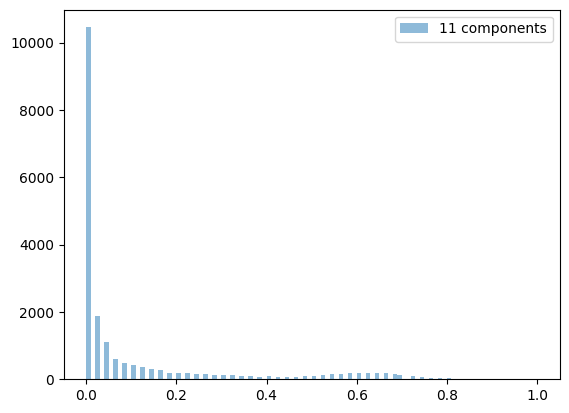

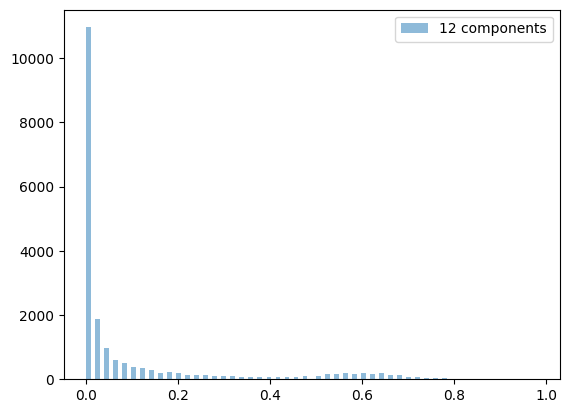

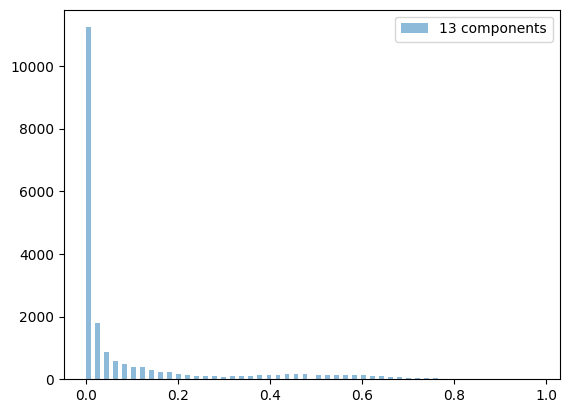

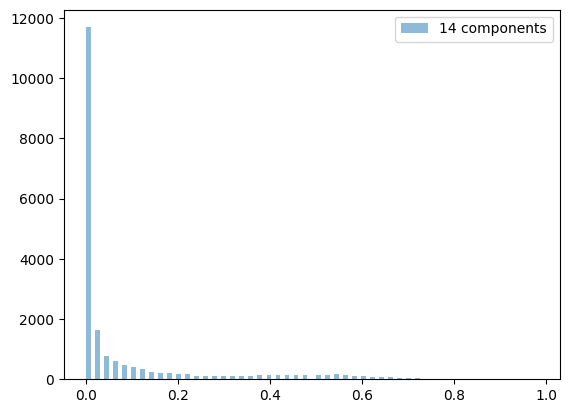

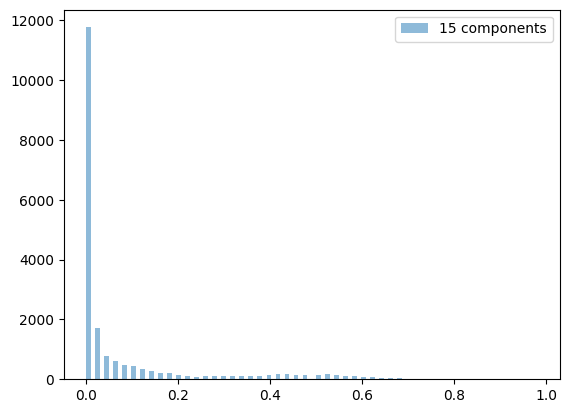

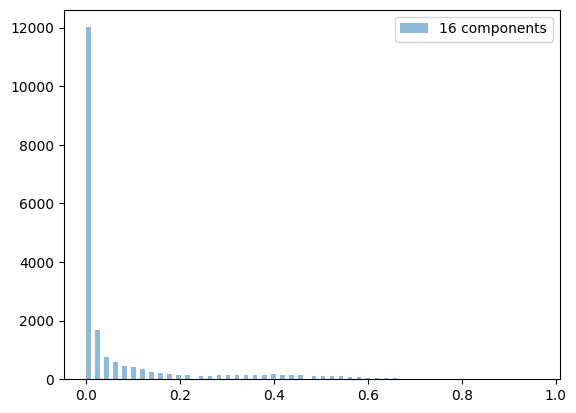

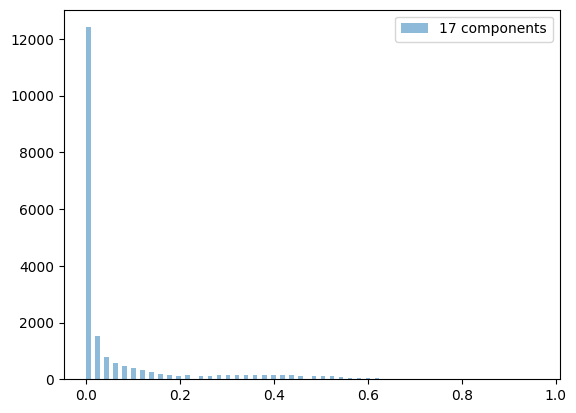

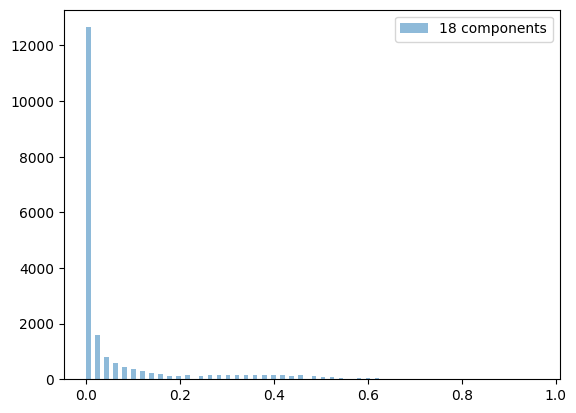

In [70]:
n_component_list = list(range(2, 19))
n_integrate = 1000
cdf_range = np.linspace(0, 1, n_integrate)
colors = plt.cm.viridis(np.linspace(0, 1, len(n_component_list)))  # Color map
areas = np.zeros(len(n_component_list))
delta_k = np.zeros(len(n_component_list))

# Prepare subplots
# fig_cdf, ax_cdf = plt.subplots(figsize=(8, 6))  # Separate figure for CDF

for i, n_component in enumerate(n_component_list):
    # Load data and compute the condensed matrix
    consensus_matrix_n = pd.read_csv(f'output/bootstrap/small_200/prob_matrix_{n_component}.csv', index_col=0)
    condensed_matrix = squareform(consensus_matrix_n.values - np.eye(consensus_matrix_n.shape[0]))
    # histogram
    plt.hist(condensed_matrix, bins=100, alpha=0.5, label=f'{n_component} components')
    plt.legend()
    plt.show()

In [62]:
consensus_matrix_3 = pd.read_csv(f'output/bootstrap/small_200/prob_matrix_{12}.csv', index_col=0)

consensus_matrix_3


,Rhodamnia dumicola,Sorbus discolor,Adenorandia kalbreyeri,Symplocos glabarrima,Norrisia malaccensis,Aglaia korthalsii,Palicourea lasiorrhachis,Trichilia pallens,Grewia multiflora,Protea lorifolia,...,Planchonella longipetiolata,Croton phebalioides,Betula populifolia,Corymbia ellipsoidea,Populus mainlingensis,Distylium dunnianum,Guettarda punctata,Styrax omuk,Eucalyptus cladocalyx,Polyosma fragrans
accepted_bin,,,,,,,,,,,,,,,,,,,,,
Rhodamnia dumicola,1.00,0.12,0.42,0.00,0.50,0.00,0.00,0.00,0.00,0.12,...,0.00,0.00,0.14,0.22,0.22,0.06,0.02,0.00,0.22,0.22
Sorbus discolor,0.12,1.00,0.14,0.10,0.14,0.00,0.04,0.00,0.00,0.04,...,0.30,0.02,0.10,0.02,0.02,0.12,0.04,0.00,0.04,0.08
Adenorandia kalbreyeri,0.42,0.14,1.00,0.08,0.48,0.00,0.02,0.00,0.00,0.00,...,0.00,0.00,0.16,0.00,0.38,0.08,0.04,0.00,0.04,0.42
Symplocos glabarrima,0.00,0.10,0.08,1.00,0.10,0.00,0.34,0.20,0.06,0.06,...,0.10,0.20,0.20,0.00,0.04,0.28,0.18,0.22,0.02,0.14
Norrisia malaccensis,0.50,0.14,0.48,0.10,1.00,0.00,0.04,0.00,0.04,0.06,...,0.02,0.04,0.28,0.16,0.34,0.18,0.04,0.00,0.12,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Distylium dunnianum,0.06,0.12,0.08,0.28,0.18,0.00,0.14,0.06,0.10,0.08,...,0.08,0.08,0.34,0.04,0.10,1.00,0.20,0.12,0.04,0.34
Guettarda punctata,0.02,0.04,0.04,0.18,0.04,0.10,0.34,0.34,0.18,0.06,...,0.06,0.24,0.16,0.00,0.08,0.20,1.00,0.18,0.00,0.22
Styrax omuk,0.00,0.00,0.00,0.22,0.00,0.26,0.24,0.30,0.08,0.02,...,0.04,0.18,0.08,0.00,0.02,0.12,0.18,1.00,0.00,0.06
